In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime as dt
import pandas as pd
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from bs4 import BeautifulSoup

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='darkgrid')

In [3]:
#consumer key, consumer secret, access token, access secret.
consumer_key = "CK"
consumer_secret = "CS"
access_token = "AT"
access_secret = "AS"

In [4]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
df = pd.DataFrame()

In [6]:
user_list = ['OfficialZZidane', 'GarethBale11', 'Cristiano', 'Benzema', 'ToniKroos']
all_tweets = []
max_tweet_count = 200
for user in user_list:
    user_tweets = api.user_timeline(screen_name=user, count=max_tweet_count, tweet_mode="extended")
    all_tweets.append([user_tweets, user])

In [8]:
count = 0
for data in all_tweets:
    user_tweets, user = data
    for tweet in user_tweets:
        count += 1
        df.loc[count,'screen_name'] = user
        df.loc[count,'created_at'] = dt.datetime.strptime(tweet._json['created_at'], '%a %b %d %H:%M:%S %z %Y')
        df.loc[count,'full_text'] = tweet.full_text
        if 'media' in tweet.entities:
            df.loc[count,'media_url'] = tweet.entities["media"][0]["media_url"]
        df.loc[count,'retweet_count'] = tweet._json['retweet_count']
        df.loc[count,'favorite_count'] = tweet._json['favorite_count']
        soup = BeautifulSoup(tweet._json['source'], 'html.parser')
        df.loc[count,'source'] = soup.get_text()
df['retweet_count'] = df['retweet_count'].astype(int)
df['favorite_count'] = df['favorite_count'].astype(int)
categories = ['screen_name', 'source']
df[categories] = df[categories].apply(lambda x: x.astype('category'))

In [9]:
df

,screen_name,created_at,full_text,media_url,retweet_count,favorite_count,source
1,OfficialZZidane,2016-08-24 22:51:24+00:00,#HalaMadrid https://t.co/lpdUlo7ZN6,http://pbs.twimg.com/media/CqqMy6XWgAAoa5y.jpg,22,100,Twitter for iPad
2,OfficialZZidane,2016-07-07 21:04:38+00:00,🇫🇷🇫🇷🇫🇷 #EURO2016,NaN,19,127,Twitter for iPad
3,OfficialZZidane,2016-06-23 22:32:07+00:00,44!! 😱😂. ZZ,NaN,16,50,Twitter for iPad
4,OfficialZZidane,2016-04-13 17:21:08+00:00,Seguimos !! \nMadrid!!\nZZ. https://t.co/6WT5K...,http://pbs.twimg.com/media/Cf8FwCwUkAAB5Vc.jpg,36,72,Twitter for iPad
5,OfficialZZidane,2016-03-16 19:08:18+00:00,"Your Turn, Paul. You are Adidas. You will #BeT...",http://pbs.twimg.com/media/CdsRw_cW8AA0gG2.jpg,11,75,Twitter for iPad
6,OfficialZZidane,2016-02-23 19:16:57+00:00,@Mayoral_Borja - Fantásticas 2 goles nuevo est...,NaN,3,10,Twitter for iPad
7,OfficialZZidane,2016-02-01 08:32:01+00:00,ZZ. https://t.co/TNcPosRjf0,http://pbs.twimg.com/media/CaHaLtxW0AAz0nL.jpg,12,52,Twitter for iPad
8,OfficialZZidane,2016-01-09 22:33:21+00:00,Gran enfrente victoria de la Bernebau. Gracias...,http://pbs.twimg.com/media/CYT-LtdWMAALGRj.jpg,28,96,Twitter for iPad
9,OfficialZZidane,2016-01-08 23:16:37+00:00,⚽️❤️. ZZ https://t.co/RTSLloIm43,http://pbs.twimg.com/media/CYO-fx4WEAA4hU5.jpg,30,99,Twitter for iPad
10,OfficialZZidane,2016-01-04 20:35:54+00:00,RT @adidasFR: Zinedine Zidane : Le Boss de Mad...,http://pbs.twimg.com/media/CX5jgkVWEAAcmmd.jpg,286,0,Twitter for iPad


In [10]:
print(df.describe())

       retweet_count  favorite_count
count      933.00000      933.000000
mean      5279.92926    31799.623794
std      10607.84895    53405.777128
min          0.00000        0.000000
25%        341.00000       72.000000
50%       1598.00000    10888.000000
75%       5211.00000    33302.000000
max     138901.00000   444009.000000


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 1 to 933
Data columns (total 7 columns):
screen_name       933 non-null category
created_at        933 non-null object
full_text         933 non-null object
media_url         690 non-null object
retweet_count     933 non-null int32
favorite_count    933 non-null int32
source            933 non-null category
dtypes: category(2), int32(2), object(3)
memory usage: 78.7+ KB
None


In [12]:
#columns = df.columns
columns = ['retweet_count', 'favorite_count']

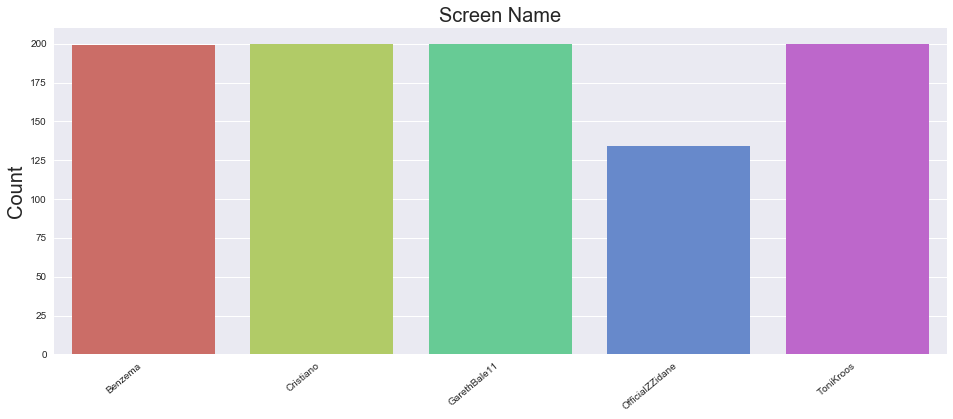

In [16]:
palettes = ['cool', 'summer', 'autumn', 'winter', 'copper', 'BuPu', 'Paired', 'pastel', 'muted', 'colorblind', 'hls']
#palettes = ['hls', 'husl', 'Set2']
palette = random.choice(palettes)
ax = sns.countplot(x='screen_name',data=df, palette=palette)
ax.set_title('Screen Name', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('')
ax.set_ylabel("Count",fontsize=20)
sns.despine(bottom=True, left=True)

## Zidane has the least tweet activity

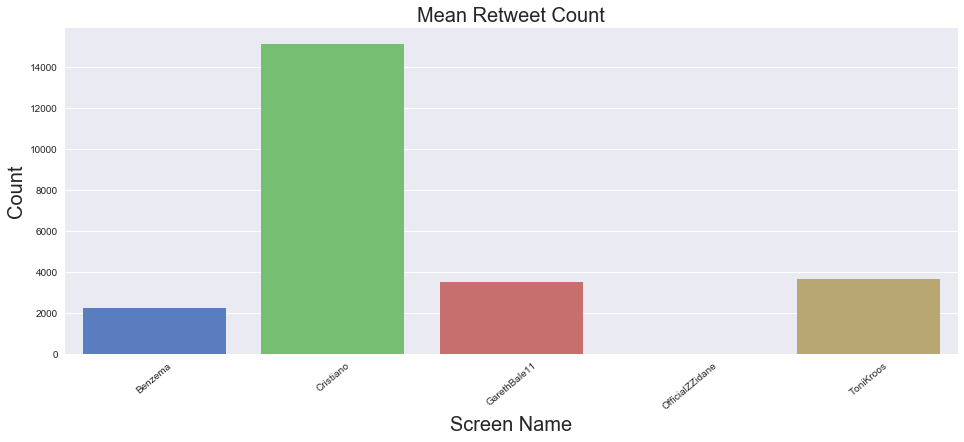

In [17]:
retweetdf = df.groupby(['screen_name'])['retweet_count'].mean().reset_index()
palettes = ['cool', 'summer', 'autumn', 'winter', 'copper', 'BuPu', 'Paired', 'pastel', 'muted', 'colorblind', 'hls']
#palettes = ['hls', 'husl', 'Set2']
palette = random.choice(palettes)
ax = sns.barplot(x='screen_name', y='retweet_count' ,data=retweetdf, palette=palette)
ax.set_title('Mean Retweet Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_xlabel('Screen Name', fontsize=20)
ax.set_ylabel("Count",fontsize=20)
sns.despine(bottom=True, left=True)

## Cristiano has the most retweets followed by Toni and Bale, Zidane has almost no retweets in this scale

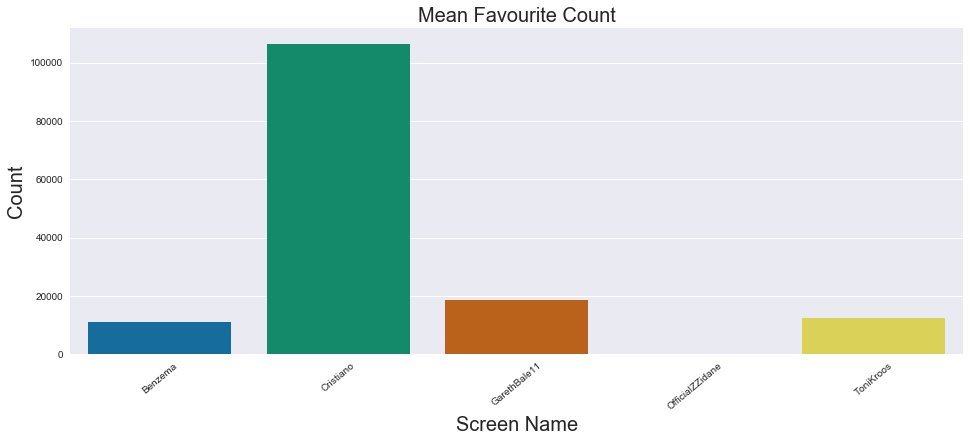

In [18]:
favouritetdf = df.groupby(['screen_name'])['favorite_count'].mean().reset_index()
palettes = ['cool', 'summer', 'autumn', 'winter', 'copper', 'BuPu', 'Paired', 'pastel', 'muted', 'colorblind', 'hls']
#palettes = ['hls', 'husl', 'Set2']
palette = random.choice(palettes)
ax = sns.barplot(x='screen_name', y='favorite_count' ,data=favouritetdf, palette=palette)
ax.set_title('Mean Favourite Count', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_xlabel('Screen Name', fontsize=20)
ax.set_ylabel("Count",fontsize=20)
sns.despine(bottom=True, left=True)

## Cristiano has the most favourites, Bale overtakes Toni in this and lastly Zidane has almost no favourites in this scale

### All the players except for Cristiano have half favourites when compared with their retweet count